# Análise



## Introdução



### Sobre o Dataset

Este dataset contém dados de 1000 pedidos de um restaurante.

### Objetivos da Análise

- Visualisar variáveis com maior impacto na demanda e na receita
- Visualizar dias e horários com maior demanda



## Preparação dos dados

### Carregamento de dados

In [1]:
# Importando a biblioteca Pandas
import pandas as pd

In [2]:
# Carregando dataset
df = pd.read_csv("food_sales.csv")

In [3]:
# Exibição prévia dos dados
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### Limpeza de dados

In [4]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


**Observações iniciais**:
- Há valores nulos na coluna `transaction_type`, representando mais de 10% dos dados.
- As colunas categóricas estão no formato `object`.
- A coluna `date` possui dados inconsistentes em relação ao formato de data.
- É importante para a análise extrair ano, mês e dia da semana da coluna `date`.

In [5]:
# Substituindo valores nulos pela categoria Unknow
df["transaction_type"] = df["transaction_type"].fillna("Unknow")

In [6]:
# Ajustando variáveis categóricas
category_columns = [
    "item_name",
    "item_type",
    "transaction_type",
    "received_by",
    "time_of_sale",
]
df[category_columns] = df[category_columns].astype("category")

In [7]:
# Ajustando a variável date para datetime
df["date"] = df["date"].str.replace("/", "-", regex=False)
df["date"] = pd.to_datetime(df["date"], format="%m-%d-%Y")

In [8]:
# Extraindo ano, mês e dia da semana de date
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month_name()
df["weekday"] = df["date"].dt.day_name()

In [9]:
# resultado final
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,weekday
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknow,Mr.,Night,2022,July,Sunday
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,August,Tuesday
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,November,Sunday
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,February,Friday
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,October,Sunday


## Análise de vendas

### Desempenho por categoria

Tabela de quantidade e receita por categoria.

In [10]:
# Quantidade e receita por categoria
df_category_orders = df.groupby("item_type", observed=True)[["quantity", "transaction_amount"]].sum()
df_category_orders

,quantity,transaction_amount
item_type,,
Beverages,2639,86390
Fastfood,5523,188840


Gráfico representando o percentual de quantidade e receita por categoria.

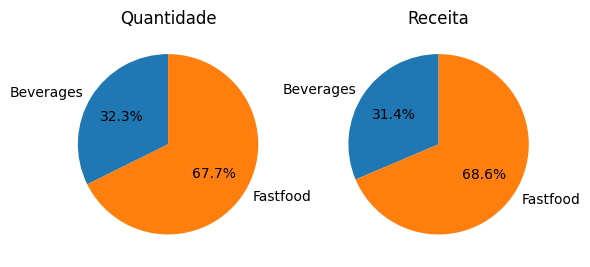

In [11]:
# Gráfico de quantidade e receita por categoria
df_category_orders.plot(
    title=["Quantidade", "Receita"],
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    legend=False,
);

Conclui-se que **Fastfood** é a categoria com maior impacto na quantidade e na receita.

### Desempenho por item

Tabela de quantidade e receita por item.

In [12]:
# Quantidade e receita por item
df_item_orders = df.groupby("item_name", observed=True)[["quantity", "transaction_amount"]].sum()
df_item_orders

,quantity,transaction_amount
item_name,,
Aalopuri,1044,20880
Cold coffee,1361,54440
Frankie,1150,57500
Panipuri,1226,24520
Sandwich,1097,65820
Sugarcane juice,1278,31950
Vadapav,1006,20120


Gráfico representando o percentual de quantidade e receita por item.

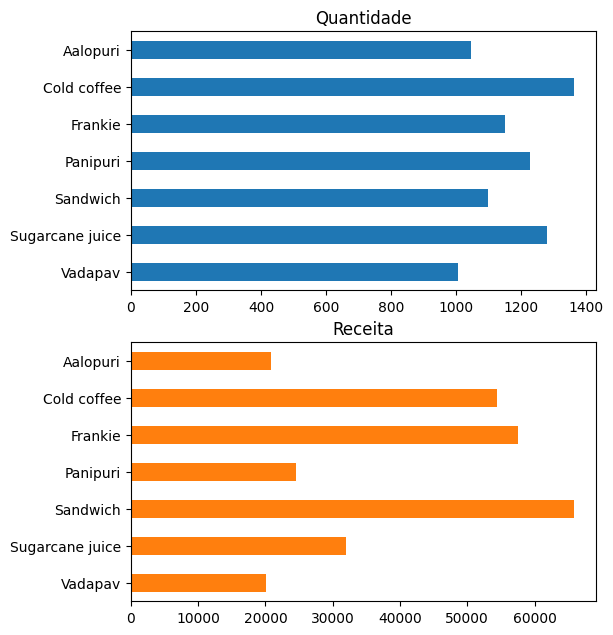

In [13]:
# Gráfico de quantidade e receita por item
df_item_orders.sort_values(by="item_name", ascending=False).plot(
    y=["quantity", "transaction_amount"],
    title=["Quantidade", "Receita"],
    kind="barh",
    subplots=True,
    ylabel="",
    legend=False,
    sharey=False,
    sharex=False,
    figsize=(6, 7.4),
);

Conclui-se que **Cold coffee** tem maior impacto na quantidade vendida, enquanto **Sandwich** tem maior impacno na receita.

## Análise de vendedores

Tabela de pedidos e receita por vendedor.

In [14]:
# Pedidos e receita por vendedor
df_received_by = df.groupby("received_by", observed=True)
received_by_agg = df_received_by.agg(
    {
        "received_by": "count",
        "transaction_amount": "sum"
    }
)

received_by_agg

,received_by,transaction_amount
received_by,,
Mr.,512,143440
Mrs.,488,131790


Gráfico representando o percentual de pedidos e receita por vendedor.

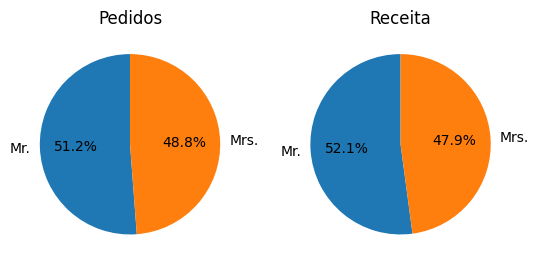

In [15]:
# Gráfico de pedidos e receita por vendedor
received_by_agg.plot(
    title=["Pedidos", "Receita"],
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    legend=False,
);

Conclui-se que **Mr.** recebeu mais pedidos e gerou mais receita.

## Análise temporal

### Desempenho Anual

Contagem de pedidos por ano.

In [17]:
# Pedidos por ano
df.groupby("year")["order_id"].count().reset_index()

,year,order_id
0,2022,746
1,2023,254


Quantidade de itens, pedidos e receita por ano.

In [18]:
# Itens, pedidos e receita por ano
df_orders_year = df.groupby("year")
order_year_agg = df_orders_year.agg(
    {
        'quantity': 'sum',
        'year': 'count',
        'transaction_amount': 'sum'
    }
)

order_year_agg

,quantity,year,transaction_amount
year,,,
2022,5954,746,195575
2023,2208,254,79655


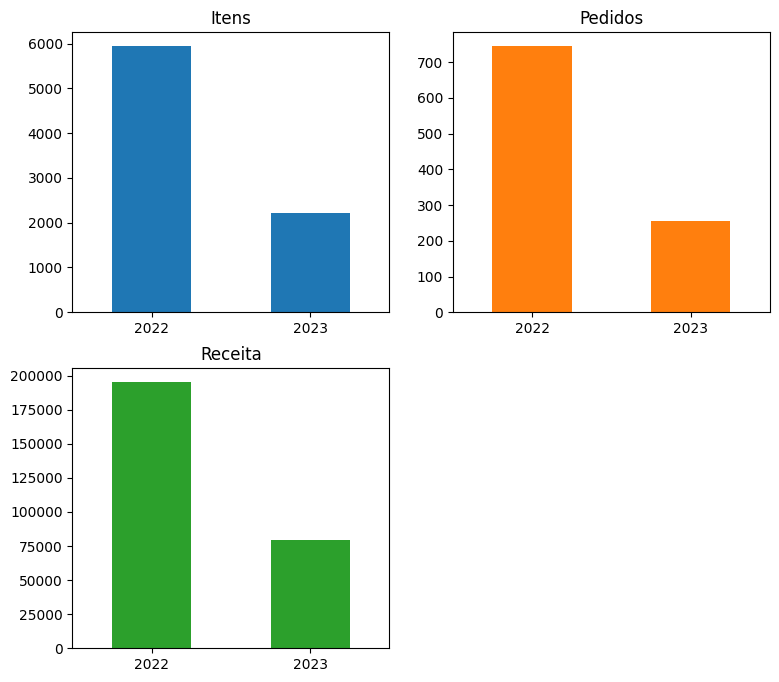

In [19]:
# Gráfico de itens, pedidos e receita por ano
order_year_agg.plot(
    title=["Itens", "Pedidos", "Receita"],
    kind="bar",
    subplots=True,
    ylabel="",
    xlabel="",
    legend=False,
    layout=(2, 2),
    figsize=(9, 8),
    sharex=False,
    rot=0,
);

Conclui-se que o ano de **2022** teve o melhor desempenho. Entretanto, isso se deve a maior quantidade de dados disponíveis para esse ano.

### Desempenho mensal entre 2022 e 2023

Gráfico de desempenho mensal por quantidade e receita.

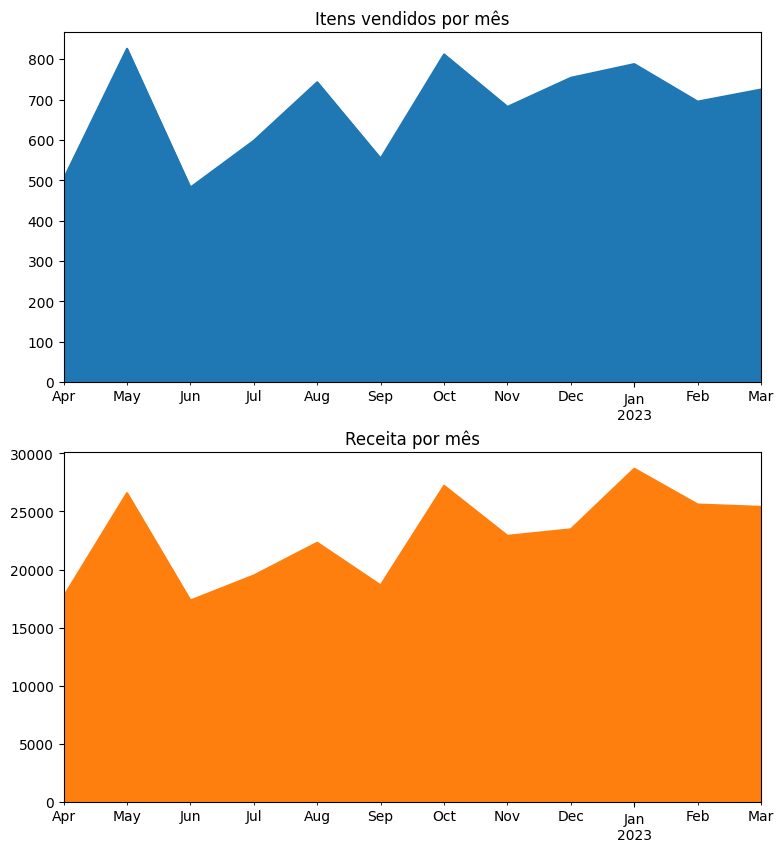

In [64]:
# Gráfico de desempenho mensal por item e receita
month_group = df[["date", "quantity", "transaction_amount"]].set_index("date")
month_sample = month_group.resample("ME").sum()

month_sample.plot(
    title=["Itens vendidos por mês", "Receita por mês"],
    kind="area",
    subplots=True,
    ylabel="",
    xlabel="",
    legend=False,
    figsize=(9, 10),
    sharex=False,
);

Conclui-se que **Maio de 2023** foi o mês com maior número de ítens vendidos. Enquanto **Janeiro de 2022** foi o mês com maior receita.

### Desempenho semanal

Tabela de pedidos e receita por Mês

In [ ]:
# Pedidos e receita por mês
df_weekday = df.groupby("weekday")[["order_id", "transaction_amount"]]
weekday_agg = df_weekday.agg(
    {
        "order_id": "count",
        "transaction_amount": "sum"
    }
).reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

weekday_agg

,order_id,transaction_amount
weekday,,
Sunday,158,43970
Monday,141,40930
Tuesday,122,36085
Wednesday,159,40380
Thursday,136,39905
Friday,134,36050
Saturday,150,37910


Gráfico de pedidos e receita por mês.

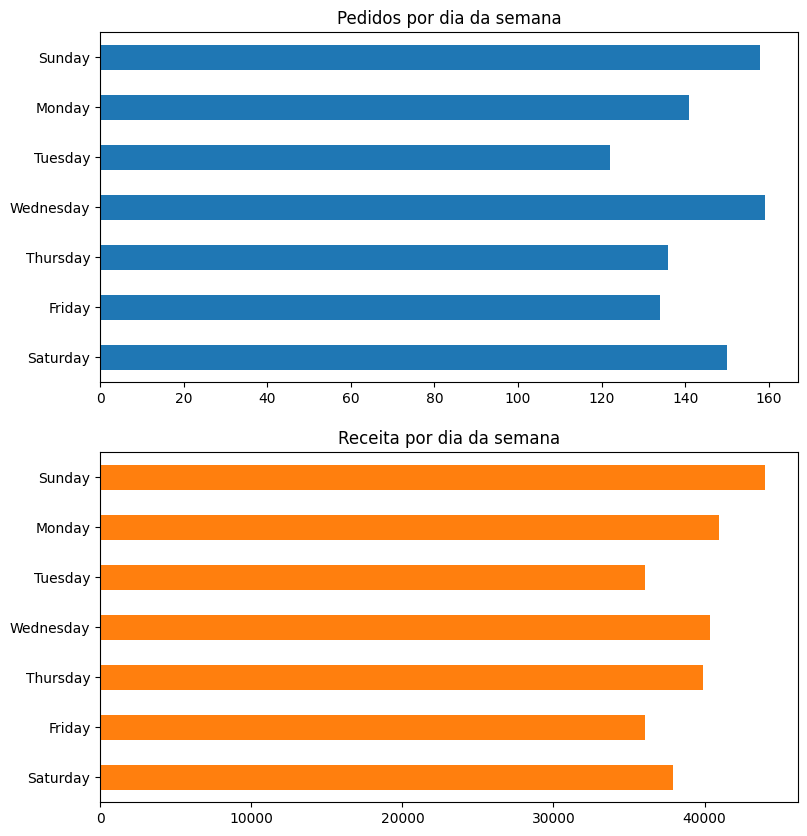

In [79]:
# Quantidade e receita por mês
weekday_agg.reset_index().sort_index(ascending=False).plot(
    title=["Pedidos por dia da semana", "Receita por dia da semana"],
    x="weekday",
    xlabel="",
    ylabel="",
    kind="barh",
    subplots=True,
    sharex=False,
    legend=False,
    figsize=(9, 10)
);

Conclui-se que **wednesday** é o dia com maior demanda, enquanto **sunday** é o dia com maior receita.